# Visualising Feature Maps of a CNN

In [21]:
class VisualiseConv:
    def __init__(self, image_path):
        super(VisualiseConv, self).__init__()
        tf, keras, layers, Model, preprocess_input, load_img, img_to_array, expand_dims, plt = self.__import_libraries()
        self.model = keras.Sequential([
                    layers.Conv2D(32, (3,3), (1,1), input_shape = (32,32,3), activation='relu'),
                    layers.MaxPooling2D((2,2)),

                    layers.Conv2D(16, (3,3), (1,1), activation='relu'),
                    layers.MaxPooling2D((2,2)),

                    layers.Conv2D(16, (3,3), (1,1), activation = 'relu'),
                    layers.MaxPooling2D((2,2)),

                    ])
        self.image_path = image_path
        
        self.feature_layers = [layer.output for layer in self.model.layers]
        self.feature_map_model = Model(self.model.input, self.feature_layers)
        self.features_map = self.feature_map_model.predict(self.__preprocess_image(load_img, img_to_array, expand_dims))
        self.__show_outputs(plt)
        
        
    def __preprocess_image(self, load_img, img_to_array, expand_dims):
        
        image = load_img( self.image_path, target_size=(32,32))
        image = img_to_array(image)
        image = expand_dims(image, axis = 0)
        return image
    
    def __show_outputs(self, plt):
        for i, layer in zip(range(len(self.features_map)), self.feature_layers):
            fig = plt.figure(figsize = (12,12))
            fig.suptitle(f'{layer.name}', fontsize = 20)
            for j in range(self.features_map[i].shape[-1]):
                plt.subplot(4,8,j+1)
                plt.imshow(self.features_map[i][0,:,:,j-1])
                
    def __import_libraries(self):    
        import tensorflow as tf
        from tensorflow import keras
        from keras import layers
        from keras.models import Model
        from keras.applications.vgg16 import preprocess_input
        from keras.utils import load_img
        from keras.utils import img_to_array
        from numpy import expand_dims
        import matplotlib.pyplot as plt
        return tf, keras, layers, Model, preprocess_input, load_img, img_to_array, expand_dims, plt

1/1 [==============================] - 0s 35ms/step


2023-04-11 19:25:20.484419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


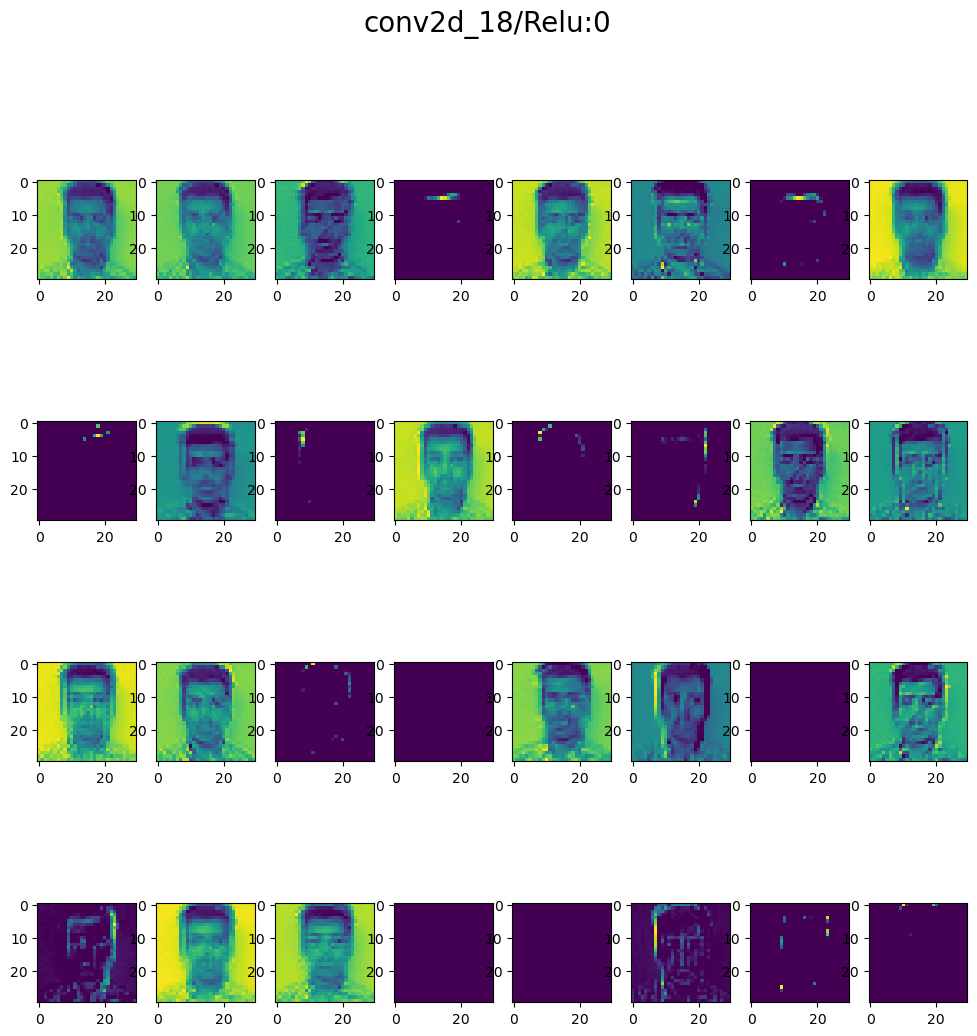

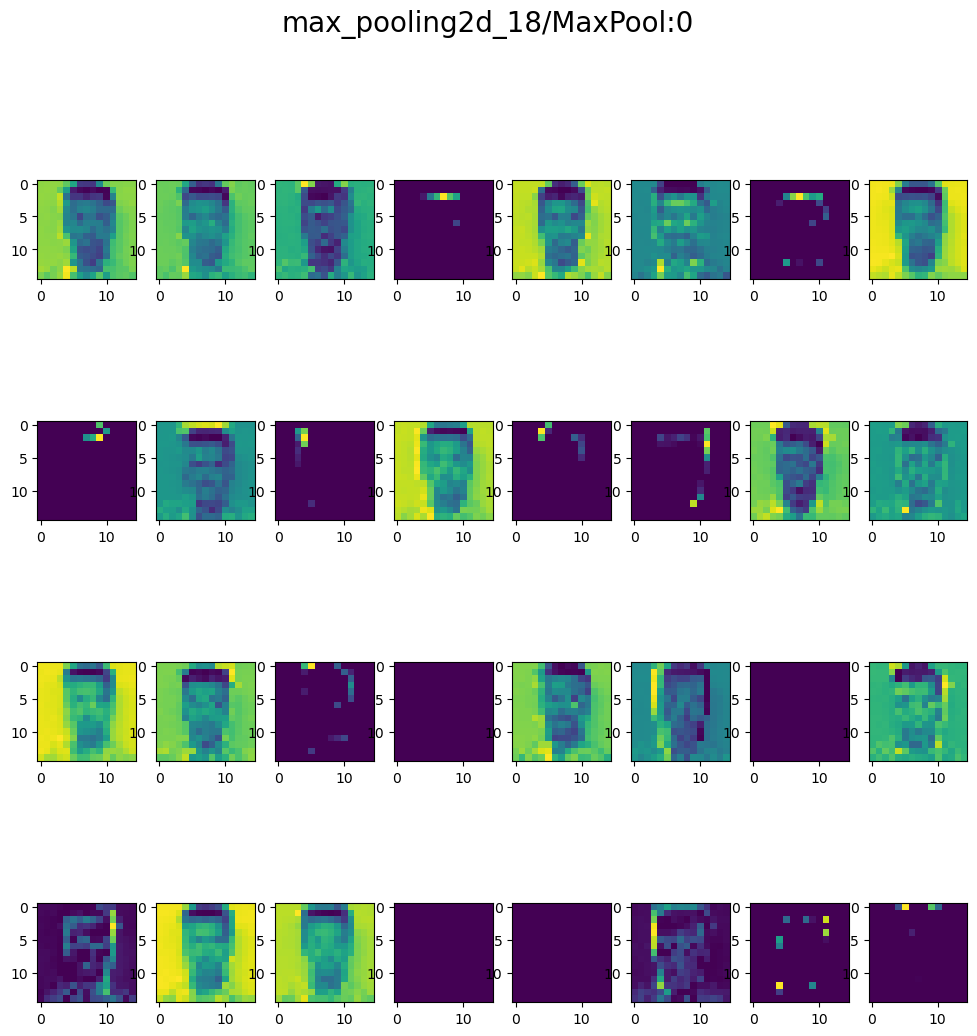

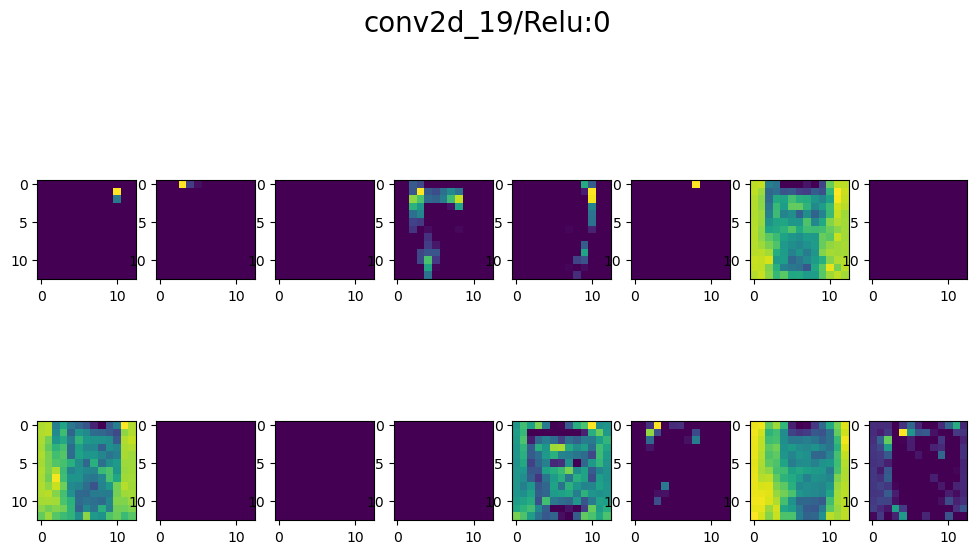

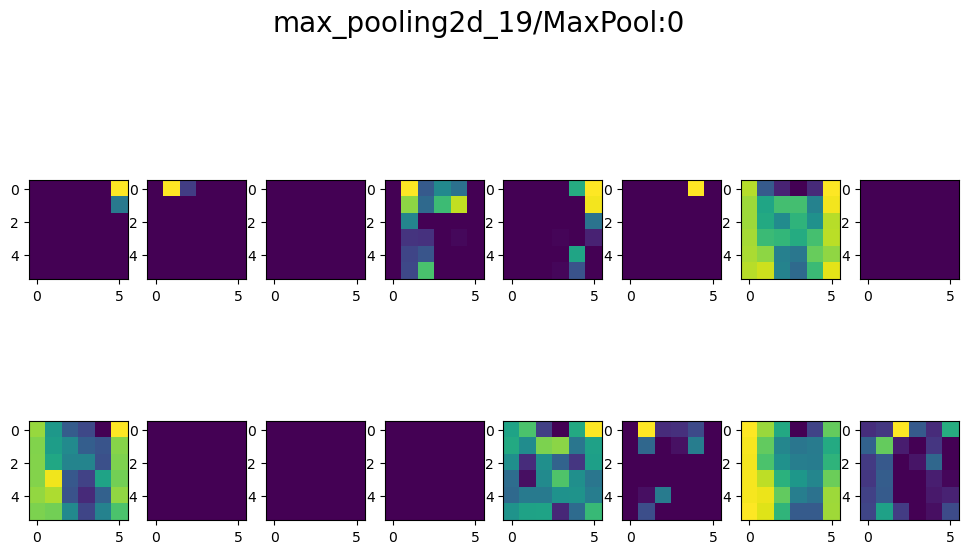

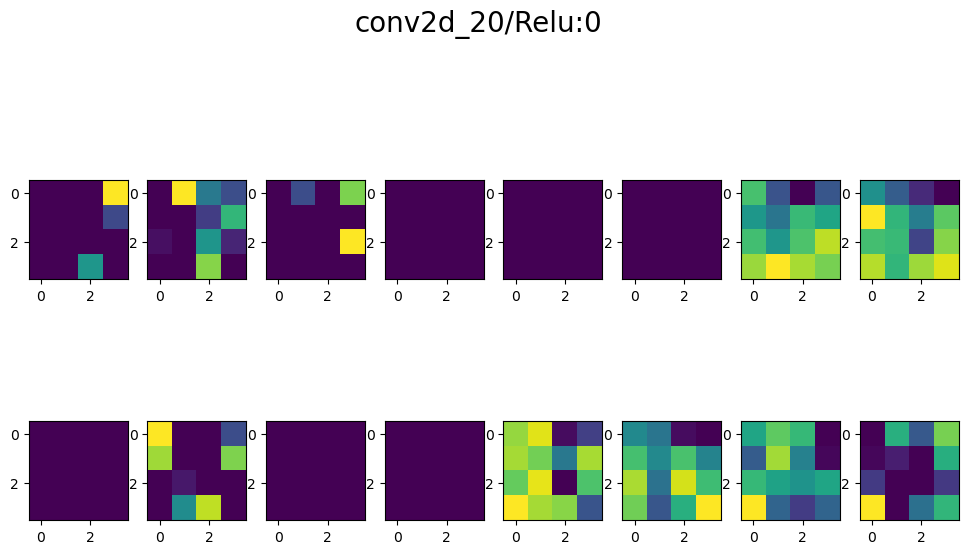

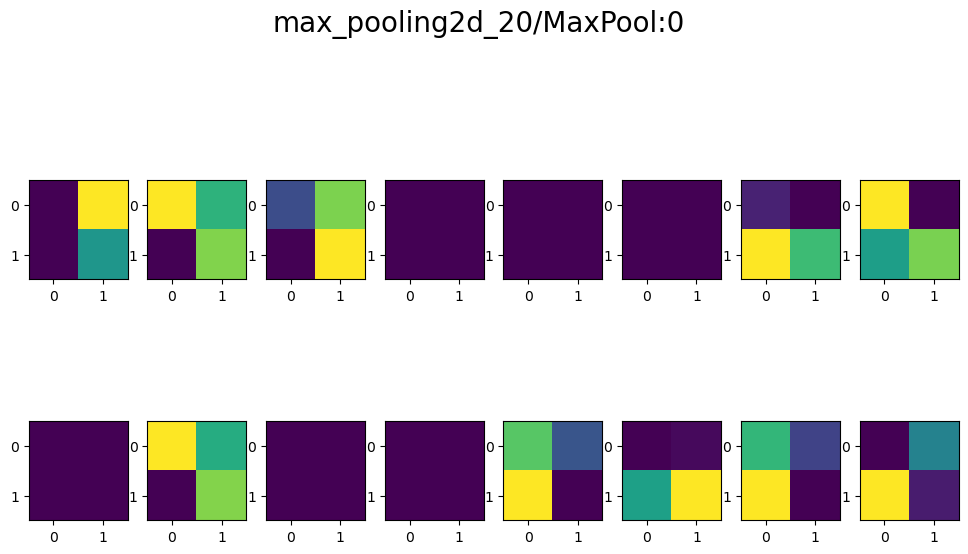

In [22]:
img_path = '/Users/rudra_sarkar/Downloads/pass_recent1.jpg'
v = VisualiseConv(img_path)